<a href="https://colab.research.google.com/github/CarolineAndradeR/Data-Science/blob/main/arvore_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Teoria das probabilidades** - Calculamos a probabilidade de um evento ocorrer a partir da análise das maneiras possíveis de ele ocorrese e do número total de resultados possíveis: P=x/t, em nque x são as maneiras possiveis de um evento ocorrer, e T, o número total de resultados possiveis.

**Conceito basico de Probabilidade** - exemplo simples, se uma moeda for jogada para o alto e ela pode cair com o lado da cara ou da coroa, tecnicamente isso é chamado de probabilidade a priori, pois é calculado o evento antes de acontecer, uma moeda tem dois lados e a conclusão é de que a respota pe de 50%.

Um diagrama de árvore de dados tem muitas vantagens, tais como:

* Por se utilizar de niveis hierárquicos, auxilia a organizar as etapas de análise.

* É um gráfico de fácil interpretação visual, sendo uma ferramenta simples e poderosa para comunicar resultados, análise etc.

* Permite, por meio da sua navegação em diferente níveis, compreender diferentes contribuições de cada "ramo" da árvore para o todo que está sendo analisado.

* Permite que utilizemos muito níveis, podendo "abrir" somente os ramos que interessam.

**Probabilidade Empírica** - Experiências realizadas em campo. Se uma moeda for jogada 100X chegamos à conclusão de que provavelmente 50X de cair cara ou coroa. Mas para calcular a probabilidade empírica, basta contar depois dos cem lançamentos quantos tiveram cara como lado superior: P(CARA)= 50/100 = 0,5 = 50%

**Árvore de Decisão e Random Forest** - Uma demostração de uma árvore de probabilidade (condicionais), de combinações de variáveis.A construção da arvore segue um algoritmo e existem vários que podem ser utilizados. O caso mais comum é de uma árvore binária e um dos algoritmos mais comuns é o C4.5.

Podemos encontrar mais de uma árvore que pode explicar o nosso problema, sendo que cada uma pode ter pontos negativos ou positivos. Podemos procurar um conjunto de árvore em que escolhemos cada uma que deverá ser utilizada, de acordo com os pontos fortes de cada uma.

O algoritmo Random Forest as arvores que compõe esse conjunto de árvore são selecionadas de forma aleatória

In [1]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/arvore_titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Definição dos dados da árvore
x_treino = df[['SibSp']]
y_treino = df['Survived']

# Construção da árvore
mod = tree.DecisionTreeClassifier()
mod = mod.fit(x_treino, y_treino)

# Visualização da árvore em formato de texto
text_representation = tree.export_text(mod)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  4.50
|   |   |   |--- class: 0



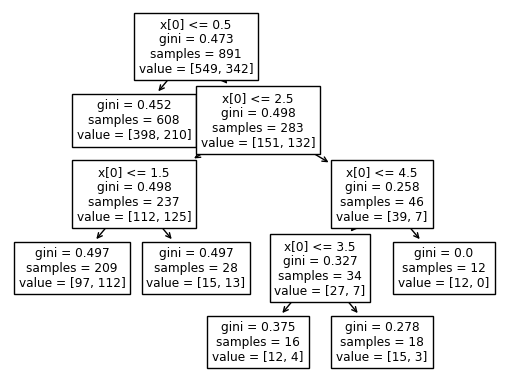

In [3]:
# Visualização da árvore em formato gráfico
tree.plot_tree(mod)
plt.show()

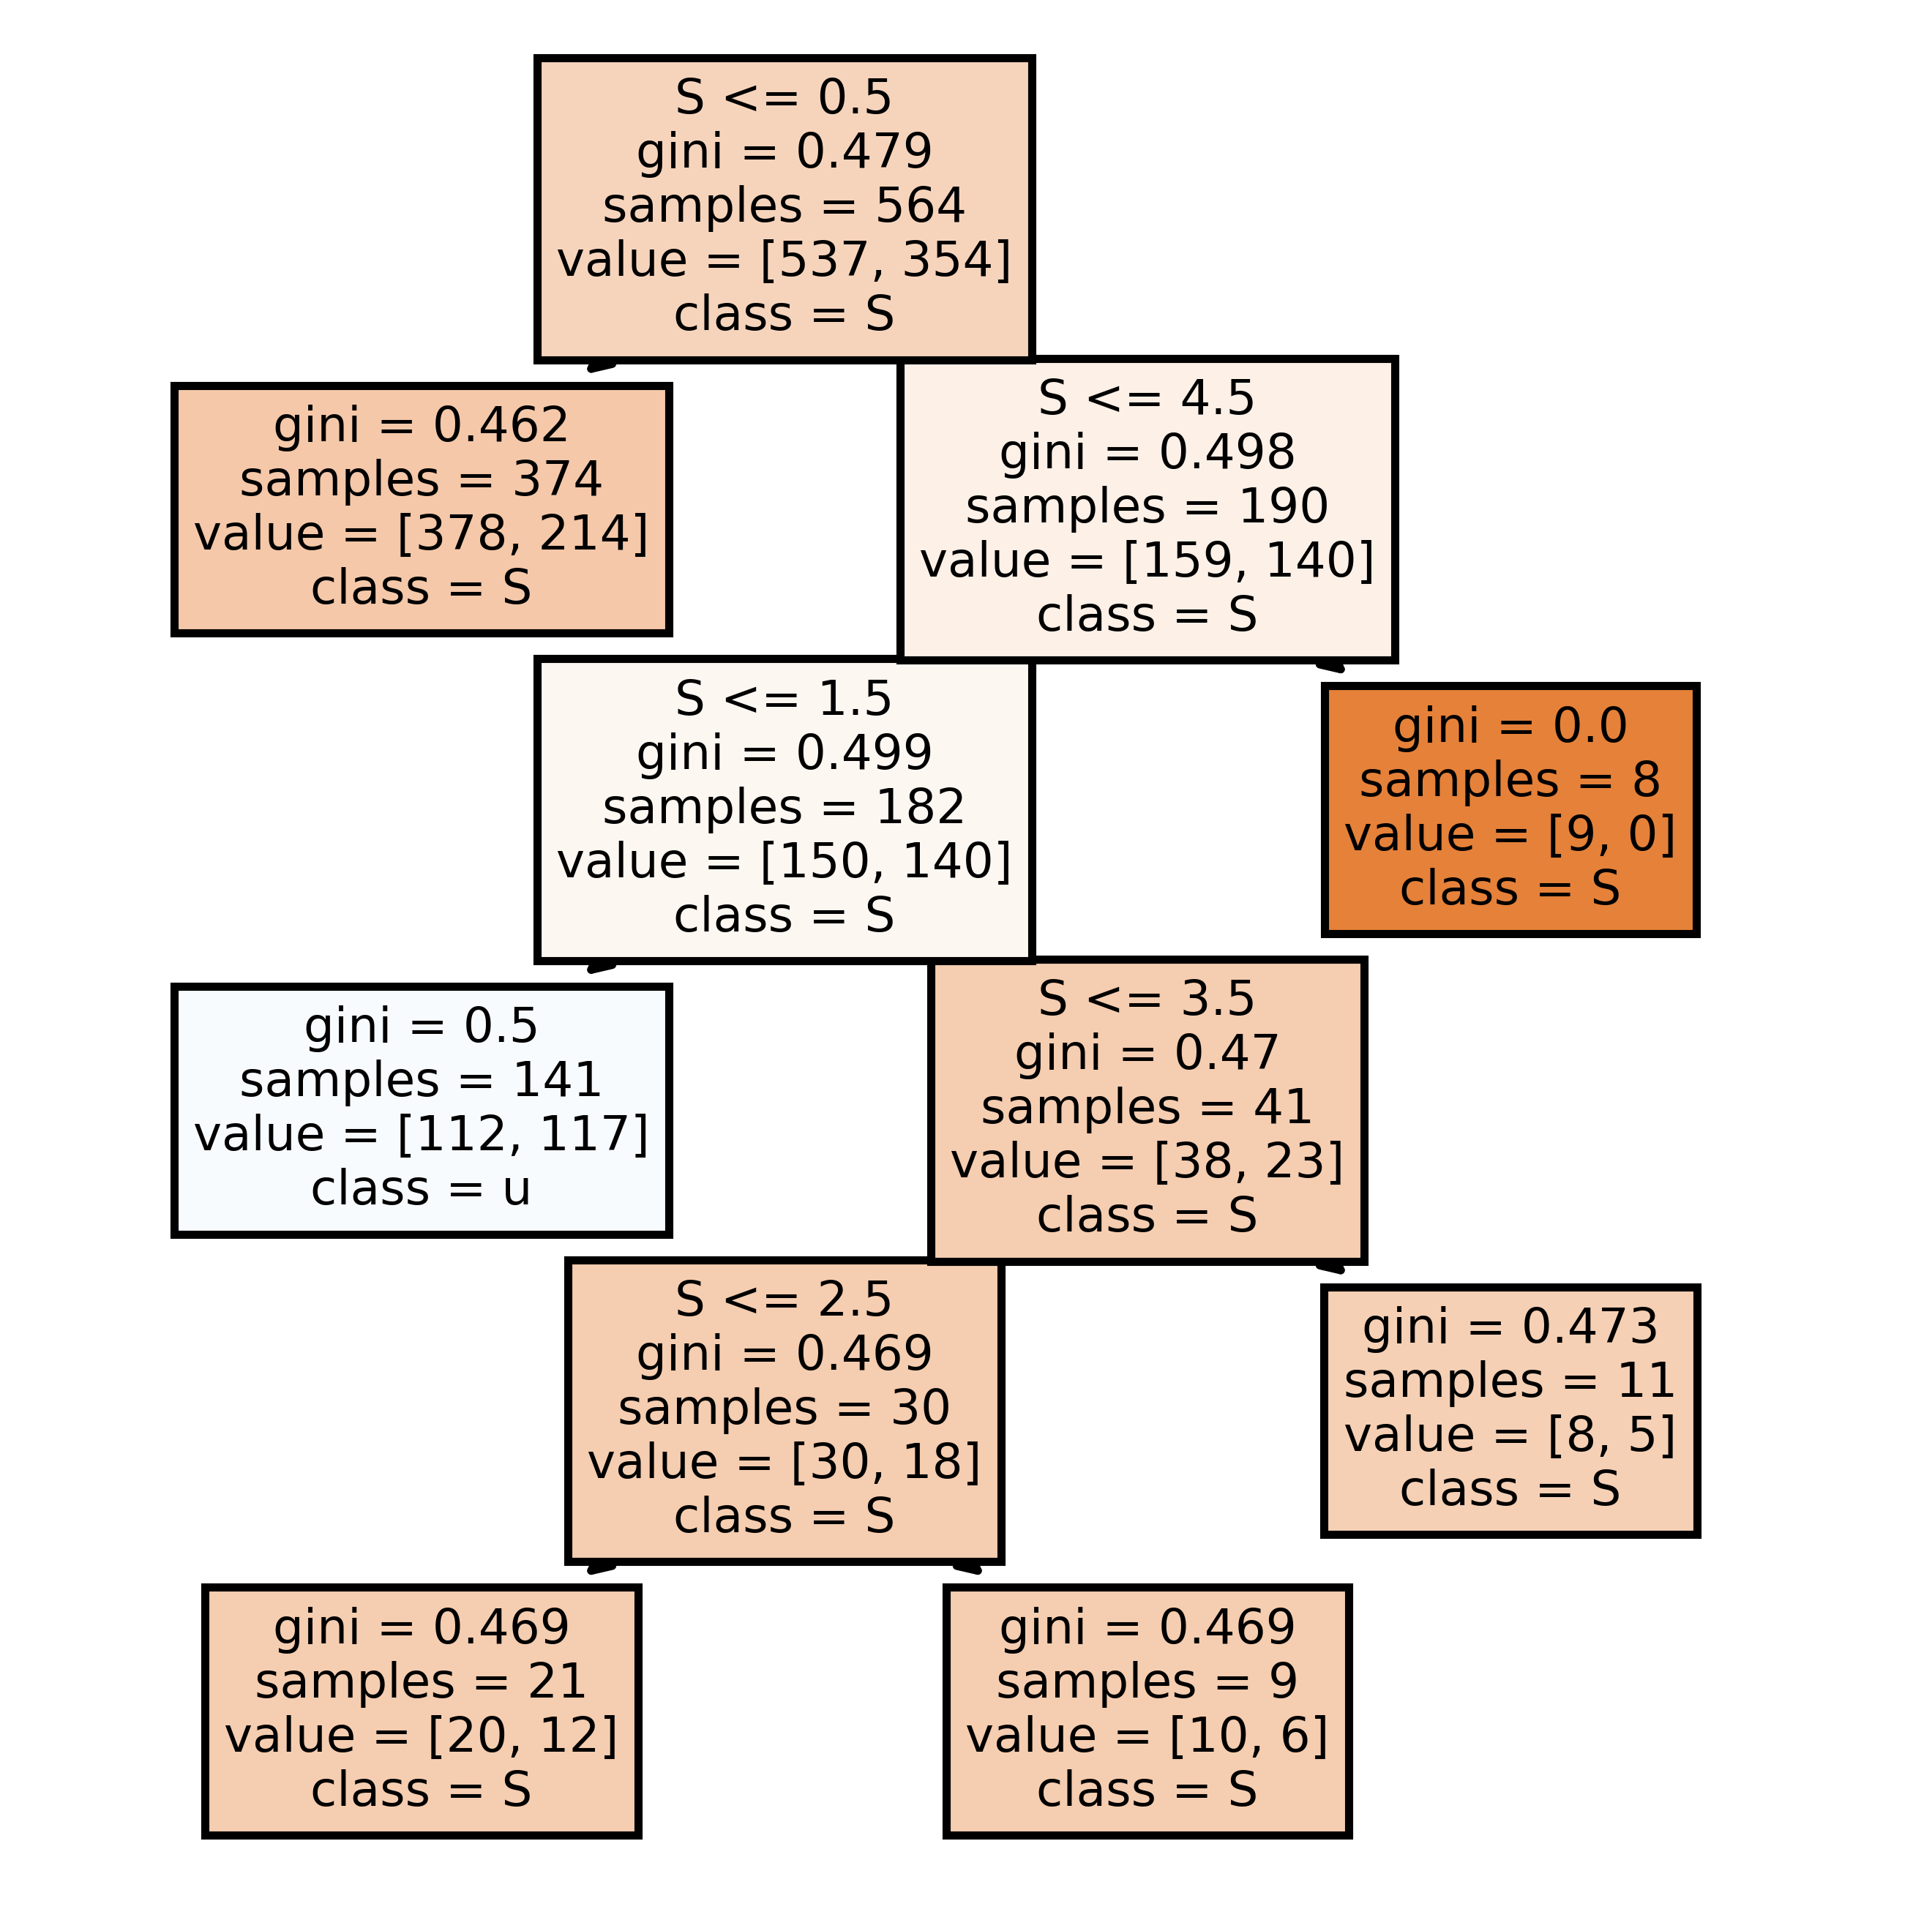

In [6]:
from sklearn.ensemble import RandomForestClassifier
mod = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
mod = mod.fit(x_treino, y_treino)
fn = 'SibSp'
cn = 'Survived'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(mod.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')